In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [15]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


6


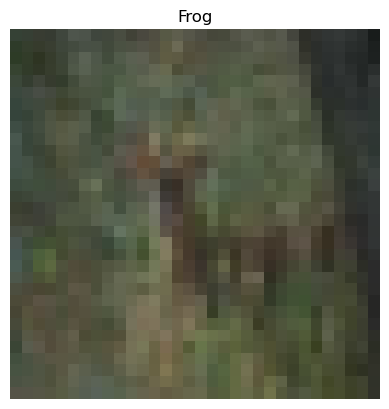

In [9]:
cifar_10_classes = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Visualize an example image from the dataset
plt.imshow(x_train[10])
plt.title(cifar_10_classes[y_train[0][0]])
plt.axis("off")
plt.show()

In [10]:
X_train = x_train / 255.0
X_test = x_test / 255.0


one_hot_encoder = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train).toarray()
y_test = one_hot_encoder.transform(y_test).toarray()

In [11]:

# Build Softmax classifier model
softmax_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation='softmax')
])


softmax_model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
softmax_model.fit(X_train, y_train , epochs=20, batch_size=64,
                      validation_data=(X_test, y_test))

C:\Users\harsh kankariya\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2797 - loss: 2.0307 - val_accuracy: 0.3472 - val_loss: 1.8580
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3614 - loss: 1.8341 - val_accuracy: 0.3679 - val_loss: 1.8372
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3666 - loss: 1.8164 - val_accuracy: 0.3732 - val_loss: 1.8205
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3755 - loss: 1.8050 - val_accuracy: 0.3358 - val_loss: 1.8999
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3822 - loss: 1.7947 - val_accuracy: 0.3511 - val_loss: 1.8731
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3793 - loss: 1.7848 - val_accuracy: 0.3647 - val_loss: 1.8131
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3872 - loss: 1.7710 - val_accuracy: 0.3647 - val_loss: 1.8349
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3924 - loss: 1.7654 - val_accuracy: 0.

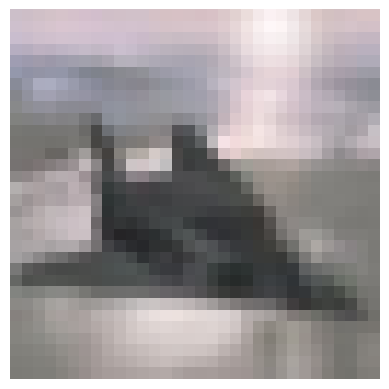

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Airplane


In [13]:
new_image = x_test[255]
plt.imshow(new_image)
plt.axis("off")
plt.show()

# Preprocess the new image
# img = np.expand_dims(new_image, axis=0)

# Make prediction
pred = softmax_model.predict(img)
prediction = np.argmax(pred)

# Print the predicted class
print(cifar_10_classes[prediction])